In [76]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
# Veri setinin okunması
df = pd.read_excel("Data.xlsx")

In [57]:
#ilk 5 satıra göz atma 
df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [61]:
# Eksik verisi olan dataları ve posta ücretlerini silme
df['Itemname'] = df['Itemname'].str.strip()

columns_to_check = ['BillNo', 'Itemname', 'Quantity', 'Date', 'Price', 'CustomerID', 'Country']
df.dropna(axis=0, subset=columns_to_check, inplace=True)
df.drop(df[df['Itemname'] == 'POSTAGE'].index, inplace=True)

df

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [63]:
#Fransadaki marketleri seçip fatura numarasında bulunan ürünleri ve miktarları gruplandırma
basket = (df[df['Country']=="France"]
          .groupby(['BillNo','Itemname'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('BillNo')         
          )

basket

Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP SUKI AND FRIENDS,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
BillNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
#Miktar değişkeni 0 olduğunda 0 , 0 dan büyük olduğunda 1 e eşitleme (Beraber alındığı sürece kaçar tane alındığı bizi ilgilendirmiyor)
def encode_units(x):
    if x <= 0:
        return False
    if x >= 1:
        return True
basket_sets = basket.map(encode_units)
basket_sets

Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP SUKI AND FRIENDS,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
BillNo,,,,,,,,,,,,,,,,,,,,,
536370,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536852,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536974,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
537065,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
537463,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580986,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
581001,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
581171,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [67]:
# minimum desteği (min_support) %9 olan verileri apriori ile hesaplayıp 
# sıklıkla birlikte bulunan (frequent_itemsets) değişkenine atama
frequent_itemsets = apriori(basket_sets, min_support=0.09, use_colnames=True)

#elimizdeki verilerden güven parametresi %75'den büyük olanları listeleme
rules = association_rules(
    frequent_itemsets, metric='confidence', min_threshold=0.75)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.138021,0.174479,0.106771,0.773585,4.433681,0.082689,3.646050,0.898460
1,(SET/20 RED RETROSPOT PAPER NAPKINS),(SET/6 RED SPOTTY PAPER CUPS),0.135417,0.140625,0.104167,0.769231,5.470085,0.085124,3.723958,0.945181
2,(SET/20 RED RETROSPOT PAPER NAPKINS),(SET/6 RED SPOTTY PAPER PLATES),0.135417,0.130208,0.104167,0.769231,5.907692,0.086534,3.769097,0.960843
3,(SET/6 RED SPOTTY PAPER PLATES),(SET/20 RED RETROSPOT PAPER NAPKINS),0.130208,0.135417,0.104167,0.800000,5.907692,0.086534,4.322917,0.955090
4,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.140625,0.130208,0.125000,0.888889,6.826667,0.106689,7.828125,0.993182
5,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.130208,0.140625,0.125000,0.960000,6.826667,0.106689,21.484375,0.981287
6,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER PLATES),0.104167,0.130208,0.101562,0.975000,7.488000,0.087999,34.791667,0.967203
7,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER CUPS),0.104167,0.140625,0.101562,0.975000,6.933333,0.086914,34.375000,0.955277
8,"(SET/6 RED SPOTTY PAPER CUPS, SET/6 RED SPOTTY...",(SET/20 RED RETROSPOT PAPER NAPKINS),0.125000,0.135417,0.101562,0.812500,6.000000,0.084635,4.611111,0.952381
9,(SET/20 RED RETROSPOT PAPER NAPKINS),"(SET/6 RED SPOTTY PAPER CUPS, SET/6 RED SPOTTY...",0.135417,0.125000,0.101562,0.750000,6.000000,0.084635,3.500000,0.963855


In [68]:
# lift değeri 5 ten büyük olanları ayıklama
rules[(rules['lift'] >= 5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(SET/20 RED RETROSPOT PAPER NAPKINS),(SET/6 RED SPOTTY PAPER CUPS),0.135417,0.140625,0.104167,0.769231,5.470085,0.085124,3.723958,0.945181
2,(SET/20 RED RETROSPOT PAPER NAPKINS),(SET/6 RED SPOTTY PAPER PLATES),0.135417,0.130208,0.104167,0.769231,5.907692,0.086534,3.769097,0.960843
3,(SET/6 RED SPOTTY PAPER PLATES),(SET/20 RED RETROSPOT PAPER NAPKINS),0.130208,0.135417,0.104167,0.800000,5.907692,0.086534,4.322917,0.955090
4,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.140625,0.130208,0.125000,0.888889,6.826667,0.106689,7.828125,0.993182
5,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.130208,0.140625,0.125000,0.960000,6.826667,0.106689,21.484375,0.981287
6,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER PLATES),0.104167,0.130208,0.101562,0.975000,7.488000,0.087999,34.791667,0.967203
7,"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",(SET/6 RED SPOTTY PAPER CUPS),0.104167,0.140625,0.101562,0.975000,6.933333,0.086914,34.375000,0.955277
8,"(SET/6 RED SPOTTY PAPER CUPS, SET/6 RED SPOTTY...",(SET/20 RED RETROSPOT PAPER NAPKINS),0.125000,0.135417,0.101562,0.812500,6.000000,0.084635,4.611111,0.952381
9,(SET/20 RED RETROSPOT PAPER NAPKINS),"(SET/6 RED SPOTTY PAPER CUPS, SET/6 RED SPOTTY...",0.135417,0.125000,0.101562,0.750000,6.000000,0.084635,3.500000,0.963855
10,(SET/6 RED SPOTTY PAPER PLATES),"(SET/20 RED RETROSPOT PAPER NAPKINS, SET/6 RED...",0.130208,0.104167,0.101562,0.780000,7.488000,0.087999,4.071970,0.996162


In [69]:
# örneğin 16 nolu veriyi incelediğimizde
 #(SET/6 RED SPOTTY PAPER PLATES) alan müşterilerin (SET/20 RED RETROSPOT PAPER NAPKINS)alma ihtimallerinin oldukça yüksek olduğunu söyleyebiliriz
# bu örnekte 

# (SET/6 RED SPOTTY PAPER PLATES) alan müşterilerin %96 sının (SET/20 RED RETROSPOT PAPER NAPKINS) aldığını görebiliriz 	(Confidence)

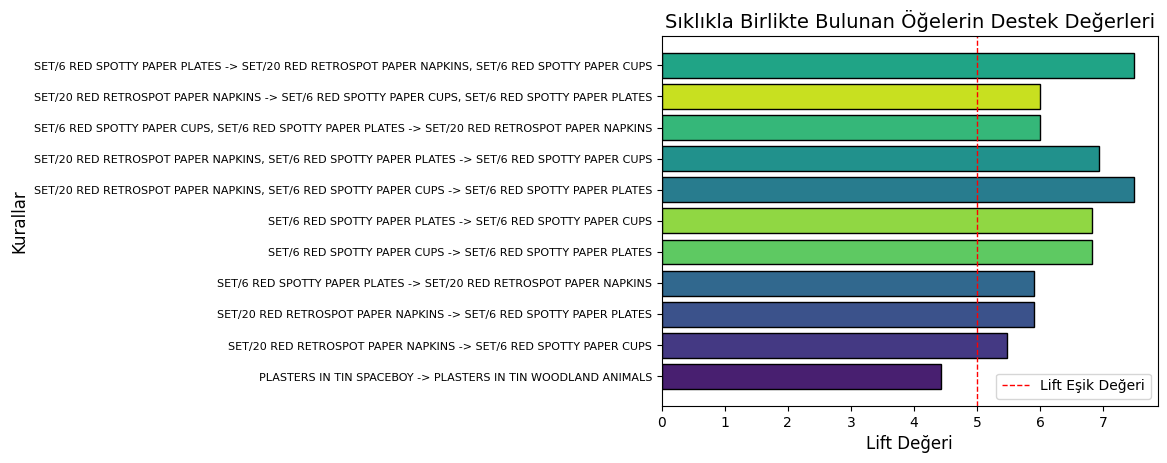

In [82]:
# Grafik
threshold_lift = 5
plt.axvline(x=threshold_lift, color='red', linestyle='--', linewidth=1, label='Lift Eşik Değeri')
plt.legend()

plt.yticks(range(len(rules)), rules['antecedents'].apply(lambda x: ', '.join(list(
    x))) + ' -> ' + rules['consequents'].apply(lambda x: ', '.join(list(x))), fontsize=8)
plt.xlabel('Lift Değeri', fontsize=12)
plt.ylabel('Kurallar', fontsize=12)
plt.title('Sıklıkla Birlikte Bulunan Öğelerin Destek Değerleri', fontsize=14)

sorted_palette = sns.color_palette('viridis', n_colors=len(rules))
sorted_indices = np.argsort(rules['lift'].values)
color_palette = [sorted_palette[i] for i in sorted_indices]

plt.barh(range(len(rules)), rules['lift'], color=color_palette, height=0.8, edgecolor='black')

plt.show()